---
# Lecture notes - Random forest
---

This is the lecture note for **random forest**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to random forest. I encourage you to read further about random forests. </p>

Read more:

- [RandomForestRegressor - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [RandomForestClassifier - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Tune hyperparameters - towardsdatascience](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d)
- [Random forest - wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Lecture slides chapter 8 - ISLR](https://hastie.su.domains/ISLR2/Slides/Ch8_Tree_Based_Methods.pdf)
- [ISLRv2 pp. 327-352](https://www.statlearning.com/)
---


## Bagging 
- In general for independent observations $Z_1, \ldots, Z_n$ with variance $\sigma^2$ each. Mean of the observations is $\bar{Z} = \frac{\sigma^2}{n}$. So by averaging set of observation we reduce the variance.
- we do this by bagging - bootstrap aggregation. We sample multiple times from a training set and average over all the predictions.
- For classification trees we use the majority vote among all the predictions by the bootstrapped trees

## Random forest
- grow many decision trees on bootstrapped samples
- randomly choose $m \approx \sqrt{p}$ predictors/features as split candidates
- choose one of these $m$ features for the split
- new $m$ features are chosen for each split

In [58]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("../assets/heart.csv", index_col = 0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [59]:
df.info() # nulls in Ca column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [60]:
df.dropna(inplace=True) # dropping them

df.info() # no more nans

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


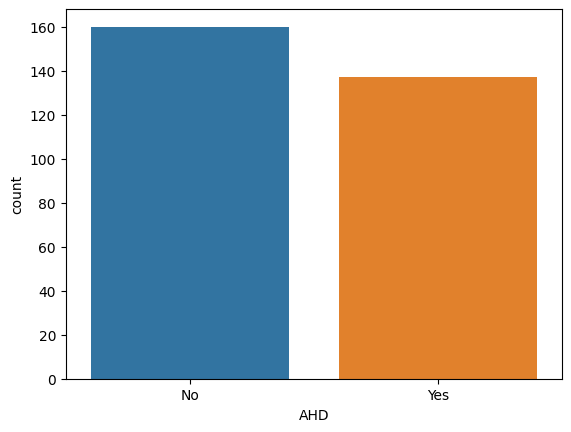

In [61]:
sns.countplot(data = df, x = "AHD");

In [62]:
df_dummies = pd.get_dummies(df, drop_first=True) # dataframe with dummy features

df_dummies.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
3,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


In [63]:
X, y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [64]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=uint8)

In [65]:
from sklearn.model_selection import GridSearchCV

# param_grid = {"n_estimators": [100, 150, 200, 300], "criterion": ["gini", "entropy"], "max_features": ["auto","sqrt", "log2"]}
# param_grid = dict(n_estimators = [100, 150, 200, 300], criterion = ["gini", "entropy"], max_features = ["auto", "sqrt", "log2"])
param_grid = dict(n_estimators = [100, 150, 200, 300], max_depth = [5, 10, 15, 20])

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=1, scoring="recall")

clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [66]:
clf.fit(X_train, y_train) # fitting model, estimating parameters 4*4 = 16 and then * 5 for cv=5 -> 80

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [67]:
clf.best_params_ # after this, repeat and close in on best params to get more exact results

{'max_depth': 5, 'n_estimators': 150}

## Evaluation
- default
- hyperparameters tuned

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        70
           1       0.85      0.77      0.81        79

    accuracy                           0.81       149
   macro avg       0.81      0.81      0.81       149
weighted avg       0.81      0.81      0.81       149



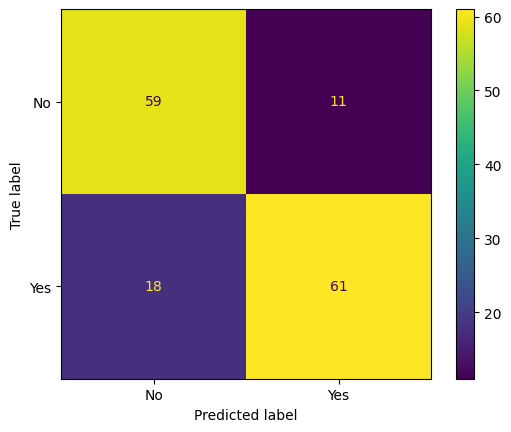

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification(y_test, y_pred, labels = ["No", "Yes"]):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()

evaluate_classification(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.76      0.91      0.83        70
           1       0.91      0.75      0.82        79

    accuracy                           0.83       149
   macro avg       0.83      0.83      0.83       149
weighted avg       0.84      0.83      0.82       149



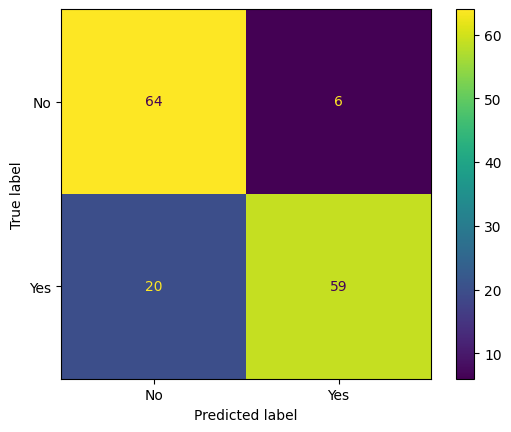

In [69]:
y_pred_tuned = clf.predict(X_test)
evaluate_classification(y_test, y_pred_tuned)

In [70]:
model_rf.feature_importances_, model_rf.feature_importances_.sum()

(array([0.08309442, 0.0668525 , 0.0643536 , 0.08563357, 0.01429205,
        0.02048963, 0.14247739, 0.02466652, 0.06938713, 0.02697629,
        0.18724273, 0.04030402, 0.00770797, 0.01965584, 0.09137092,
        0.05549543]),
 1.0)

In [71]:
feature_importance = pd.DataFrame([X.columns, model_rf.feature_importances_]).T

feature_importance.head()

,0,1
0,Age,0.083094
1,Sex,0.066852
2,RestBP,0.064354
3,Chol,0.085634
4,Fbs,0.014292


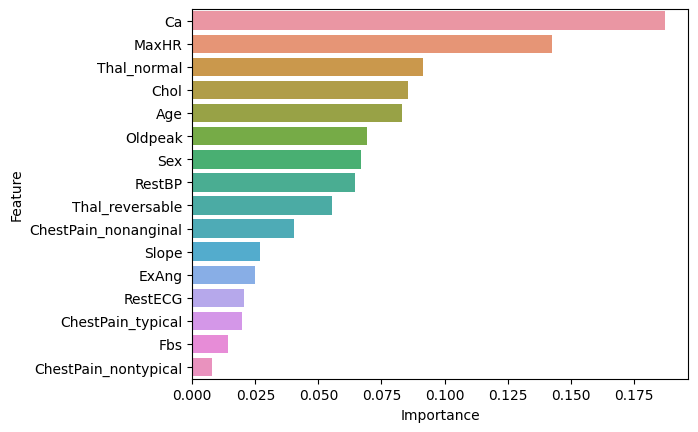

In [72]:
feature_importance.columns = ["Feature", "Importance"] # naming the columns

feature_importance.sort_values(by = "Importance", ascending = False, inplace = True) # sorting in descending order

sns.barplot(data = feature_importance, x = "Importance", y = "Feature"); # plotting

In [73]:
feature_importance["Importance"].sum()

1.0000000000000002

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
